In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import fits

from cycspec_simulator import (
    TemplateProfile,
    BasebandModel,
    FreqOnlyPredictor,
    ExponentialScatteringModel,
    pspec_ryan4,
    pspec_corrfirst,
    pspec_numba,
)

%matplotlib notebook

In [2]:
template_file = "B1937+21.Rcvr1_2.GUPPI.15y.x.sum.sm"
template = TemplateProfile.from_file(template_file)
template.normalize()
template.make_posdef()

Adjusting I**2 by 5.5361972783884994e-08


<IPython.core.display.Javascript object>


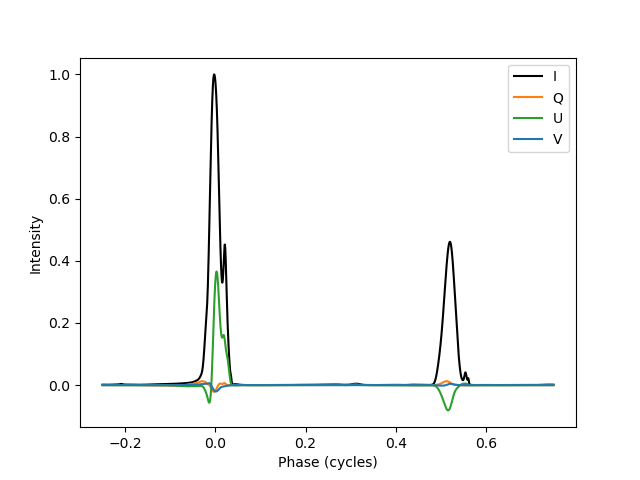

In [3]:
template.plot(what='IQUV', shift=0.25)
plt.show()

In [4]:
pulse_freq = 641.948222127829 # Hz
bandwidth = 1.5625e6 # Hz

In [5]:
model = BasebandModel(template, bandwidth=bandwidth, pulse_freq=pulse_freq)
data = model.sample(2**19)

In [6]:
predictor = FreqOnlyPredictor(pulse_freq)

In [7]:
%time pspec = pspec_ryan4(data, 128, 256, predictor)

CPU times: user 4.13 s, sys: 1.9 s, total: 6.03 s
Wall time: 6.03 s


<IPython.core.display.Javascript object>


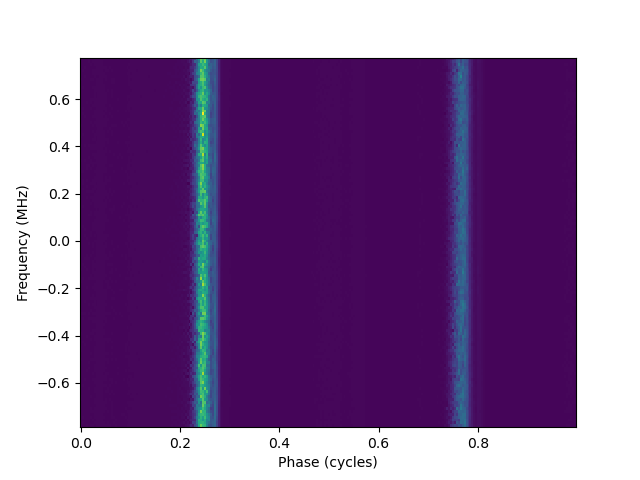

In [8]:
pspec.plot(shift=0.25)
plt.show()

In [9]:
%time pspec = pspec_corrfirst(data, 128, 256, predictor)

CPU times: user 2.62 s, sys: 265 ms, total: 2.89 s
Wall time: 2.89 s


<IPython.core.display.Javascript object>


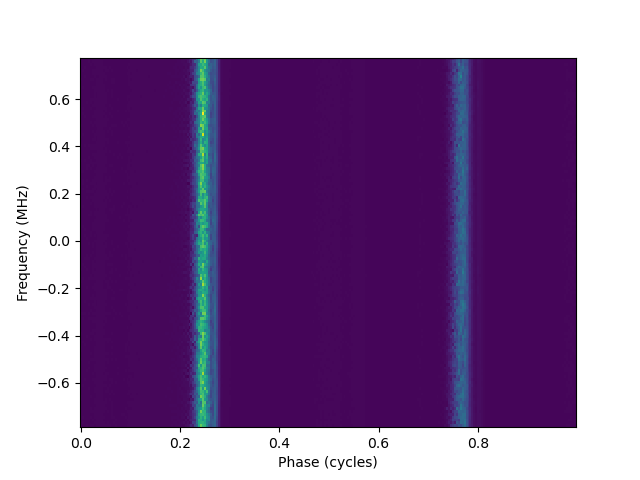

In [10]:
pspec.plot(shift=0.25)
plt.show()

In [12]:
%time pspec = pspec_numba(data, 128, 256, predictor)

CPU times: user 189 ms, sys: 297 µs, total: 189 ms
Wall time: 186 ms


<IPython.core.display.Javascript object>


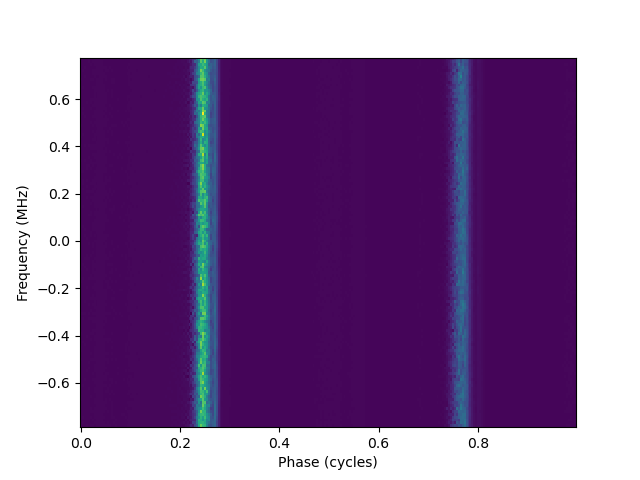

In [13]:
pspec.plot(shift=0.25)
plt.show()

In [14]:
scattering_model = ExponentialScatteringModel(scattering_time=2e-6, bandwidth=data.bandwidth, cutoff=20)
pattern = scattering_model.realize()

<IPython.core.display.Javascript object>


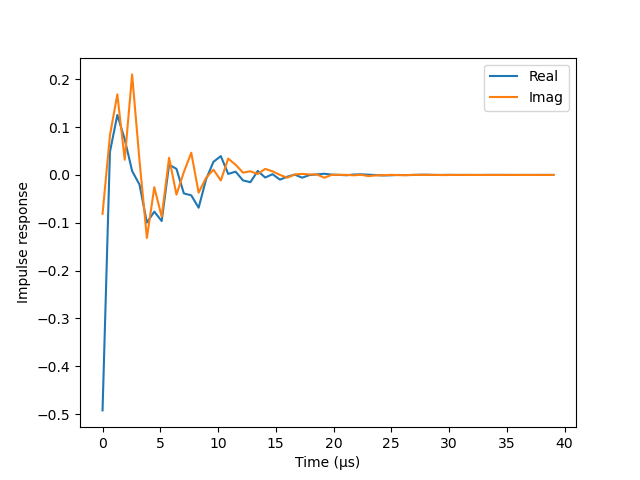

In [15]:
pattern.plot_impulse_response()
plt.show()

<IPython.core.display.Javascript object>


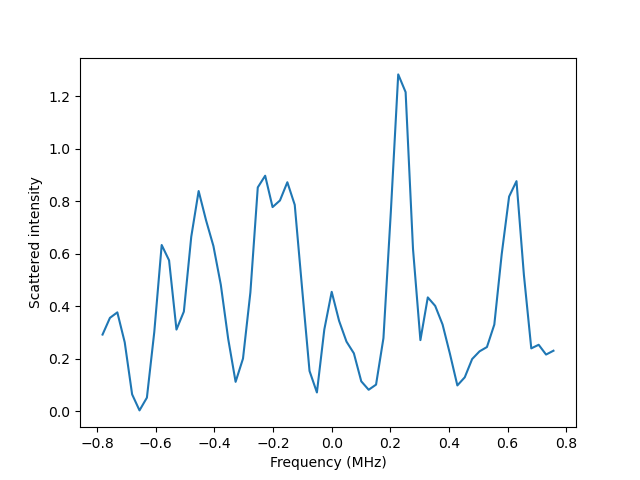

In [16]:
pattern.plot_scattered_intensity()
plt.show()

In [17]:
data_scattered = pattern.scatter(data)

In [18]:
%time pspec = pspec_numba(data_scattered, 128, 256, predictor)

CPU times: user 211 ms, sys: 0 ns, total: 211 ms
Wall time: 209 ms


<IPython.core.display.Javascript object>


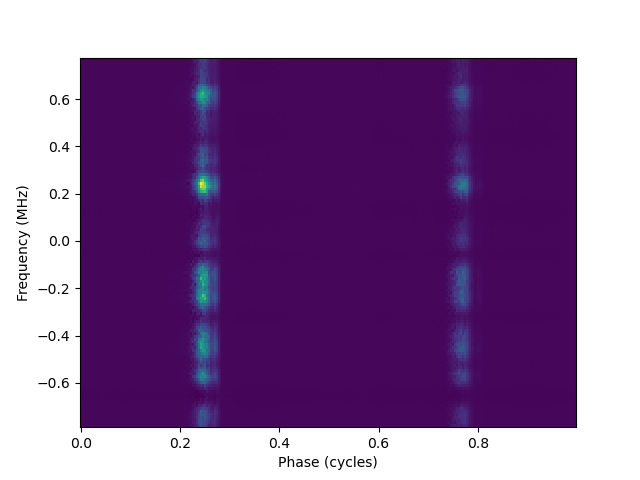

In [19]:
pspec.plot(shift=0.25)
plt.show()